In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

#read our csv's into several dataframes
incident = pd.read_csv("incident.csv")
neighborhoods = pd.read_csv("neighborhoods.csv")
infrastructure1 = pd.read_csv("crosswalk.csv")
infrastructure2 = pd.read_csv("walkability.csv")
green_space = pd.read_csv("park.csv")

#read our shapefile of the pittsburgh neighborhoods
pgh = gpd.read_file('Neighborhoods_.shp')


In [2]:
incident_dict_neighborhood = dict()

for index, row in incident.iterrows():
        itemName = row['INCIDENTNEIGHBORHOOD']
        if itemName in incident_dict_neighborhood:
            incident_dict_neighborhood[itemName] = incident_dict_neighborhood[itemName] + 1
        else:
            incident_dict_neighborhood[itemName] = 1
            
print(incident_dict_neighborhood)

{'North Shore': 3235, 'Upper Lawrenceville': 1467, 'Northview Heights': 2365, 'Golden Triangle/Civic Arena': 4278, 'South Side Flats': 16889, 'Elliott': 2291, 'Homewood North': 5840, 'South Side Slopes': 3778, 'Carrick': 10457, 'South Oakland': 2121, nan: 5950, 'Bloomfield': 7854, 'Beechview': 4975, 'Bluff': 4078, 'Strip District': 2956, 'Mount Washington': 6701, 'East Carnegie': 380, 'Crafton Heights': 2464, 'Marshall-Shadeland': 4915, 'East Liberty': 7250, 'East Allegheny': 5297, 'Friendship': 1495, 'Arlington': 1882, 'Central Northside': 786, 'Spring Hill-City View': 2172, 'Brighton Heights': 5531, 'Westwood': 1480, 'East Hills': 4513, 'Brookline': 6712, 'South Shore': 1095, 'Lower Lawrenceville': 2265, 'Bedford Dwellings': 2298, 'Troy Hill-Herrs Island': 252, 'Central Oakland': 4688, 'Garfield': 3102, 'West End': 1100, 'West Oakland': 1729, 'Central Lawrenceville': 3948, 'Lincoln-Lemington-Belmar': 5987, 'Sheraden': 5307, 'Beltzhoover': 1817, 'Outside City': 1944, 'Squirrel Hill So

In [3]:
incident_dict_severity = dict()

for index, row in incident.iterrows():
    neighborhood_name = row['INCIDENTNEIGHBORHOOD']
    init_string = row['OFFENSES']
    almost_there = init_string[0:4]
    offense_num = ''.join(c for c in almost_there if c.isdigit())
    if neighborhood_name in incident_dict_severity:
        incident_dict_severity[neighborhood_name] = incident_dict_severity[neighborhood_name] + int(offense_num)
    else:
        incident_dict_severity[neighborhood_name] = int(offense_num)
        
print(incident_dict_severity)

{'North Shore': 15449017, 'Upper Lawrenceville': 7342240, 'Northview Heights': 11178813, 'Golden Triangle/Civic Arena': 19796762, 'South Side Flats': 73529334, 'Elliott': 11706320, 'Homewood North': 26086825, 'South Side Slopes': 17657918, 'Carrick': 49179044, 'South Oakland': 10583481, nan: 25090107, 'Bloomfield': 36226302, 'Beechview': 25477777, 'Bluff': 20188361, 'Strip District': 14057898, 'Mount Washington': 32251707, 'East Carnegie': 2036882, 'Crafton Heights': 12987074, 'Marshall-Shadeland': 23799191, 'East Liberty': 33917048, 'East Allegheny': 24640565, 'Friendship': 6864107, 'Arlington': 8766285, 'Central Northside': 3340143, 'Spring Hill-City View': 10390098, 'Brighton Heights': 26726140, 'Westwood': 7455684, 'East Hills': 20527400, 'Brookline': 34849302, 'South Shore': 5205124, 'Lower Lawrenceville': 10625512, 'Bedford Dwellings': 11227259, 'Troy Hill-Herrs Island': 1219491, 'Central Oakland': 20535234, 'Garfield': 15084268, 'West End': 6668510, 'West Oakland': 8463362, 'Cen

In [5]:
#now lets average out the level of crime based on the number of incidents
for neighborhood, value in incident_dict_severity.items():
    
    incident_dict_severity[neighborhood] = incident_dict_severity[neighborhood]/incident_dict_neighborhood[neighborhood]
    
print(incident_dict_severity)

{'North Shore': 4775.58485316847, 'Upper Lawrenceville': 5004.935241990457, 'Northview Heights': 4726.770824524313, 'Golden Triangle/Civic Arena': 4627.574100046751, 'South Side Flats': 4353.681923145243, 'Elliott': 5109.698821475338, 'Homewood North': 4466.922089041096, 'South Side Slopes': 4673.8798305982, 'Carrick': 4702.97829205317, 'South Oakland': 4989.854314002829, nan: 4216.824705882353, 'Bloomfield': 4612.465240641711, 'Beechview': 5121.16120603015, 'Bluff': 4950.554438450221, 'Strip District': 4755.71650879567, 'Mount Washington': 4812.969258319654, 'East Carnegie': 5360.215789473684, 'Crafton Heights': 5270.728084415585, 'Marshall-Shadeland': 4842.154832146491, 'East Liberty': 4678.213517241379, 'East Allegheny': 4651.796299792335, 'Friendship': 4591.375919732442, 'Arlington': 4657.962274176408, 'Central Northside': 4249.545801526718, 'Spring Hill-City View': 4783.654696132597, 'Brighton Heights': 4832.062918097993, 'Westwood': 5037.624324324324, 'East Hills': 4548.504320850

In [4]:
#now that we have a dictionary with neighborhood names and the average severity of their crimes
#we should make it into a dataframe

#make the dict into a series, then into a datafram
neighborhood_crime_average_severity = pd.Series(incident_dict_severity).to_frame()

#to name the columns we need to reset the index
neighborhood_crime_average_severity = neighborhood_crime_average_severity.reset_index()

#now name the columns
neighborhood_crime_average_severity.columns = ['Neighborhoods','Crime Average']

#sort the rows by crime average, low to high
neighborhood_crime_average_severity = neighborhood_crime_average_severity.sort_values('Crime Average')

#remove any NaN values
neighborhood_crime_average_severity = neighborhood_crime_average_severity.dropna()

#reorder the index from 0-97
neighborhood_crime_average_severity = neighborhood_crime_average_severity.reset_index(drop = True)


print(neighborhood_crime_average_severity)


                Neighborhoods  Crime Average
0             Mt. Oliver Boro         426641
1     Mt. Oliver Neighborhood         471364
2      Troy Hill-Herrs Island        1219491
3                   Ridgemont        1354858
4              Outside County        1483460
..                        ...            ...
93                  Shadyside       35863569
94                 Bloomfield       36226302
95                    Carrick       49179044
96           South Side Flats       73529334
97  Central Business District       82702845

[98 rows x 2 columns]


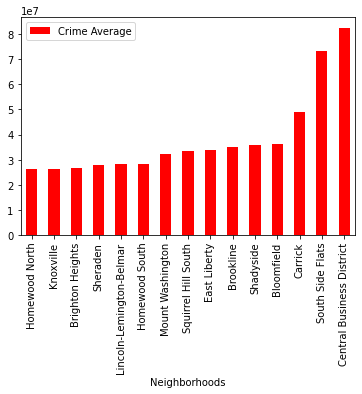

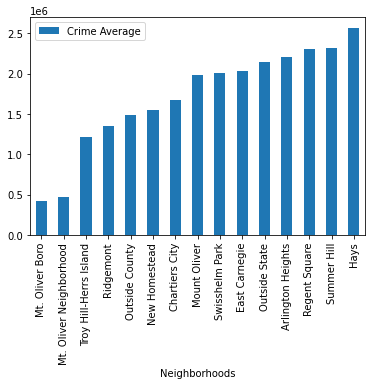

In [5]:
#create two bar graphs, one for best neighborhoods
neighborhood_crime_average_severity.tail(15).plot.bar(x='Neighborhoods', color='red')

#one for worst neighborhoods
neighborhood_crime_average_severity.head(15).plot.bar(x='Neighborhoods')


In [6]:
#lets create a dictionary storing the number of crosswalks each neighborhood has
crosswalk_frequency = dict()

for index, row in infrastructure1.iterrows():
        itemName = row['neighborhood']
        if itemName in crosswalk_frequency:
            crosswalk_frequency[itemName] = crosswalk_frequency[itemName] + 1
        else:
            crosswalk_frequency[itemName] = 1
            
print(crosswalk_frequency)

{'Central Business District': 402, 'Strip District': 114, 'Morningside': 33, 'Squirrel Hill North': 112, 'Squirrel Hill South': 239, 'Shadyside': 190, 'Polish Hill': 29, 'North Oakland': 125, 'West Oakland': 41, 'Central Oakland': 113, 'East Liberty': 146, 'Bloomfield': 192, 'South Oakland': 66, 'Stanton Heights': 22, 'Terrace Village': 67, 'Highland Park': 64, 'Bluff': 82, 'Lincoln-Lemington-Belmar': 29, 'Lincoln Place': 15, 'Lower Lawrenceville': 40, 'Crawford-Roberts': 63, 'Middle Hill': 59, 'Bedford Dwellings': 8, 'Upper Hill': 21, 'Point Breeze': 91, 'Larimer': 58, 'Point Breeze North': 53, 'Homewood West': 20, 'Homewood North': 40, 'Homewood South': 81, 'East Hills': 21, nan: 14, 'Friendship': 37, 'Regent Square': 15, 'South Side Flats': 262, 'South Shore': 15, 'Swisshelm Park': 7, 'Greenfield': 68, 'Hazelwood': 68, 'Glen Hazel': 7, 'Elliott': 25, 'Hays': 7, 'Esplen': 15, 'New Homestead': 1, 'Central Lawrenceville': 81, 'West End': 24, 'Troy Hill': 40, 'East Allegheny': 60, 'Spri

In [7]:
#make the dict into a series, then into a dataframe
neighborhood_crosswalk_frequency = pd.Series(crosswalk_frequency).to_frame()

#to name the columns we need to reset the index
neighborhood_crosswalk_frequency = neighborhood_crosswalk_frequency.reset_index()

#now name the columns
neighborhood_crosswalk_frequency.columns = ['Neighborhood','Crosswalks']

#sort the rows by crime average, low to high
neighborhood_crosswalk_frequency = neighborhood_crosswalk_frequency.sort_values('Crosswalks')

#remove any NaN values
neighborhood_crosswalk_frequency = neighborhood_crosswalk_frequency.dropna()

#reorder the index from 0-97
neighborhood_crosswalk_frequency = neighborhood_crosswalk_frequency.reset_index(drop = True)


print(neighborhood_crosswalk_frequency)

                 Neighborhood  Crosswalks
0               New Homestead           1
1              Chartiers City           1
2                   St. Clair           1
3                 Summer Hill           3
4                    Fineview           3
..                        ...         ...
83                  Shadyside         190
84                 Bloomfield         192
85        Squirrel Hill South         239
86           South Side Flats         262
87  Central Business District         402

[88 rows x 2 columns]


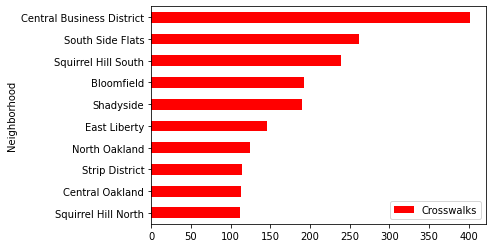

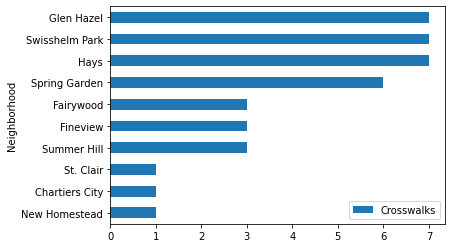

In [8]:
#create two bar graphs, one for best neighborhoods
neighborhood_crosswalk_frequency.tail(10).plot.barh(x='Neighborhood', color='red')

#one for worst neighborhoods
neighborhood_crosswalk_frequency.head(10).plot.barh(x='Neighborhood')
